In [106]:
%pip install chardet

import pandas as pd 
import numpy as np 
import chardet
import matplotlib.pyplot as plt
import re

Note: you may need to restart the kernel to use updated packages.


In [107]:
# Load dataset 
rawdata = open('../data/FY2023_archived_opportunities.csv', 'rb').read()
result = chardet.detect(rawdata)
encoding = result['encoding']

df = pd.read_csv('../data/FY2023_archived_opportunities.csv', encoding=encoding)
df.head()

,NoticeId,Title,Sol#,Department/Ind.Agency,CGAC,Sub-Tier,FPDS Code,Office,AAC Code,PostedDate,...,SecondaryContactPhone,SecondaryContactFax,OrganizationType,State,City,ZipCode,CountryCode,AdditionalInfoLink,Link,Description
0,3628df647dd64f6bb9e5e5bd81eaab06,Black Rock Lock Lower MITRE Gate Installation,W912P422B0019,DEPT OF DEFENSE,21,DEPT OF THE ARMY,2100,W072 ENDIST BUFFALO,W912P4,2022-11-10 15:45:16.852-05,...,7168794126,NaN,OFFICE,NY,BUFFALO,14207-3199,USA,NaN,https://sam.gov/opp/3628df647dd64f6bb9e5e5bd81...,"The BRL MITRE Gates installation consists of, ..."
1,abc3eac976bb4239bcbe7629c6afdf95,PFPA Law Enforcement Duty Gear Equipment,WB111020221449,DEPT OF DEFENSE,97,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2022-11-10 15:44:09.961-05,...,NaN,NaN,OFFICE,DC,WASHINGTON,203011000,USA,NaN,https://sam.gov/opp/abc3eac976bb4239bcbe7629c6...,THIS IS NOT A REQUEST FOR QUOTES/PROPOSALS and...
2,dc6d23486a0e4574bf6fc799ee4262bb,Crane Hoisting Services,W50SLF-23-Q-0001,DEPT OF DEFENSE,21,DEPT OF THE ARMY,2100,W7M4 USPFO ACTIVITY HIANG 154,W50SLF,2022-11-10 15:25:21.391-05,...,8088446422,8088446340,OFFICE,HI,HONOLULU,96816-4495,USA,NaN,https://sam.gov/opp/dc6d23486a0e4574bf6fc799ee...,This is a combined synopsis/solicitation for c...
3,a4f5d2bc671d4804be95cd363806982b,Emergency Flood Repairs of Elevators and Eleva...,36C26123C0009,"VETERANS AFFAIRS, DEPARTMENT OF",36,"VETERANS AFFAIRS, DEPARTMENT OF",3600,261-NETWORK CONTRACT OFFICE 21 (36C261),36C261,2022-11-10 14:49:22.997-05,...,NaN,NaN,OFFICE,CA,MATHER,95655,USA,NaN,https://sam.gov/opp/a4f5d2bc671d4804be95cd3638...,Emergency Flood Repairs of Elevators and Eleva...
4,be26926501194cdabf78055d47292623,Emergency Flood Repairs of Elevators and Eleva...,36C26123C0009,"VETERANS AFFAIRS, DEPARTMENT OF",36,"VETERANS AFFAIRS, DEPARTMENT OF",3600,261-NETWORK CONTRACT OFFICE 21 (36C261),36C261,2022-11-10 14:41:49.351-05,...,NaN,NaN,OFFICE,CA,MATHER,95655,USA,NaN,https://sam.gov/opp/be26926501194cdabf78055d47...,Emergency Flood Repairs of Elevators and Eleva...


In [108]:
print(df.columns)

Index(['NoticeId', 'Title', 'Sol#', 'Department/Ind.Agency', 'CGAC',
       'Sub-Tier', 'FPDS Code', 'Office', 'AAC Code', 'PostedDate', 'Type',
       'BaseType', 'ArchiveType', 'ArchiveDate', 'SetASideCode', 'SetASide',
       'ResponseDeadLine', 'NaicsCode', 'ClassificationCode',
       'PopStreetAddress', 'PopCity', 'PopState', 'PopZip', 'PopCountry',
       'Active', 'AwardNumber', 'AwardDate', 'Award$', 'Awardee',
       'PrimaryContactTitle', 'PrimaryContactFullname', 'PrimaryContactEmail',
       'PrimaryContactPhone', 'PrimaryContactFax', 'SecondaryContactTitle',
       'SecondaryContactFullname', 'SecondaryContactEmail',
       'SecondaryContactPhone', 'SecondaryContactFax', 'OrganizationType',
       'State', 'City', 'ZipCode', 'CountryCode', 'AdditionalInfoLink', 'Link',
       'Description'],
      dtype='object')


In [109]:
# Summarize the dataset by state, focusing on the number of contracts and total award amount per state
summary_by_state = df.groupby('State').agg(Contracts=('AwardNumber', 'count'), Total_Award_Amount=('Award$', 'sum'))

print(summary_by_state.head())

summary_by_state['Total_Award_Amount'] = pd.to_numeric(summary_by_state['Total_Award_Amount'], errors='coerce')

# Sort the summary by the Total Award Amount in descending order
summary_sorted = summary_by_state.sort_values(by='Total_Award_Amount', ascending=False)

summary_sorted.head(10)  # Display the top 10 states for a quick view

       Contracts                                 Total_Award_Amount
State                                                              
AA             0                                                  0
AE             9  46800.002410650.001088800.001088801.001087666....
AK            12  5943939.001896246.001000000000.00241195.001088...
AL            11  21384.004959686.4056000.0056000.0013392678.003...
AP            18  20343671.92763836.29383529.7725159181.96251591...


,Contracts,Total_Award_Amount
State,,
NV,3,1.080030e+09
ME,2,2.693400e+04
IA,1,2.074800e+04
AA,0,0.000000e+00
DE,0,0.000000e+00
ND,0,0.000000e+00
Rabat,0,0.000000e+00
AE,9,NaN
AK,12,NaN


In [110]:
sargent_awardee = df[df['Awardee'].str.contains('SARGENT', na=False)]

sargent_awardee = sargent_awardee[['Title', 'Sol#','Department/Ind.Agency','Office','Award$',
                                    'PostedDate', 'Link', 'City', 'ZipCode', 'CountryCode']]
sargent_awardee

,Title,Sol#,Department/Ind.Agency,Office,Award$,PostedDate,Link,City,ZipCode,CountryCode
430,"48--VALVE,LINEAR,DIRECT",N0010422QFC70,DEPT OF DEFENSE,NAVSUP WEAPON SYSTEMS SUPPORT MECH,708776,2022-10-31 15:05:28.532-04,https://sam.gov/opp/4e423902fd364eb7af9a09e25d...,MECHANICSBURG,17050-0788,USA
3186,"48--VALVE,LINEAR,DIRECT, IN REPAIR/MODIFICATIO...",N0010422QNE48,DEPT OF DEFENSE,NAVSUP WEAPON SYSTEMS SUPPORT MECH,441148,2022-10-19 07:12:34.921-04,https://sam.gov/opp/f2cfdf800e104989abb87807aa...,MECHANICSBURG,17050-0788,USA
3189,"48--VALVE,LINEAR,DIRECT, IN REPAIR/MODIFICATIO...",N0010422QNF03,DEPT OF DEFENSE,NAVSUP WEAPON SYSTEMS SUPPORT MECH,712534,2022-10-19 07:10:38.632-04,https://sam.gov/opp/5150da5aa2394e12a54fd14bd4...,MECHANICSBURG,17050-0788,USA
3190,"48--VALVE,LINEAR DIRECT, IN REPAIR/MODIFICATIO...",N0010422QNE33,DEPT OF DEFENSE,NAVSUP WEAPON SYSTEMS SUPPORT MECH,644419,2022-10-19 07:10:28.536-04,https://sam.gov/opp/fb0e2c4809ee451e9151e3969b...,MECHANICSBURG,17050-0788,USA
3191,"48--VALVE,LINEAR,DIRECT, IN REPAIR/MODIFICATIO...",N0010422RNG45,DEPT OF DEFENSE,NAVSUP WEAPON SYSTEMS SUPPORT MECH,573027,2022-10-19 07:10:18.683-04,https://sam.gov/opp/bb60c90a8f0b416784bc1b9581...,MECHANICSBURG,17050-0788,USA
4594,"48--VALVE,LINEAR,DIRECT, IN REPAIR/MODIFICATIO...",N0010422RNG05,DEPT OF DEFENSE,NAVSUP WEAPON SYSTEMS SUPPORT MECH,353220,2022-10-15 07:07:03.823-04,https://sam.gov/opp/373e924a7bf64fa59011d3d6ab...,MECHANICSBURG,17050-0788,USA


In [111]:
sargent_awardee.columns

Index(['Title', 'Sol#', 'Department/Ind.Agency', 'Office', 'Award$',
       'PostedDate', 'Link', 'City', 'ZipCode', 'CountryCode'],
      dtype='object')

In [112]:
# Summarize the dataset by awardee, focusing on the number of contracts and total award amount per awardee
summary_by_awardee = df.groupby('Awardee').agg(Contracts=('AwardNumber', 'count'), Total_Award_Amount=('Award$', 'sum'))

summary_by_awardee['Total_Award_Amount'] = pd.to_numeric(summary_by_awardee['Total_Award_Amount'], errors='coerce')
# Sort the summary by the Total Award Amount in descending order
summary_sorted_awardee = summary_by_awardee.sort_values(by='Total_Award_Amount', ascending=False)

summary_sorted_awardee.head(10)  # Display the top 10 awardees for a quick view


,Contracts,Total_Award_Amount
Awardee,,
"SARGENT AEROSPACE & DEFENSE LLC, TUCSON, AZ 85743-9453",6,7.087764e+35
"SIKORSKY AIRCRAFT CORP, STRATFORD, CT 06615-9129",6,5.321595e+35
"ADIRONDACK ELECTRONICS INC, ROUND LAKE, NY 12151-1710",5,6.781233e+22
"ARGON ST INC, SMITHFIELD, PA 15478-0905",3,4.139656e+18
"MISSION SYSTEMS DAVENPOST INC, DAVENPORT, IA 52804-1203",3,6.984003e+17
"ROLLS-ROYCE CORPORATION, INDIANAPOLIS, IN 46225-1103",2,3.846926e+14
Northrop Grumman Systems Corporation,2,2.155343e+14
"LOCKHEED MARTIN CORP, ARCHBALD, PA 18403-1527",3,3.458015e+13
Intel Federal LLC 4100 Monument Corner Drive Suite 540 Fairfax VA 22030 USA,2,1.814126e+13


In [113]:
# Convert the summary to a table format for easy viewing
summary_table_awardee = summary_sorted_awardee.reset_index()

# Prepare the table for display
summary_table_awardee_display = summary_table_awardee[['Awardee', 'Contracts', 'Total_Award_Amount']].head(10)
summary_table_awardee_display.columns = ['Awardee', 'Number of Contracts', 'Total Award Amount ($)']
summary_table_awardee_display


,Awardee,Number of Contracts,Total Award Amount ($)
0,"SARGENT AEROSPACE & DEFENSE LLC, TUCSON, AZ 85...",6,7.087764e+35
1,"SIKORSKY AIRCRAFT CORP, STRATFORD, CT 06615-9129",6,5.321595e+35
2,"ADIRONDACK ELECTRONICS INC, ROUND LAKE, NY 121...",5,6.781233e+22
3,"ARGON ST INC, SMITHFIELD, PA 15478-0905",3,4.139656e+18
4,"MISSION SYSTEMS DAVENPOST INC, DAVENPORT, IA 5...",3,6.984003e+17
5,"ROLLS-ROYCE CORPORATION, INDIANAPOLIS, IN 4622...",2,3.846926e+14
6,Northrop Grumman Systems Corporation,2,2.155343e+14
7,"LOCKHEED MARTIN CORP, ARCHBALD, PA 18403-1527",3,3.458015e+13
8,Intel Federal LLC 4100 Monument Corner Drive S...,2,1.814126e+13
9,"THALES DEFENSE & SECURITY INC, CLARKSBURG, MD ...",2,1.028216e+13


In [114]:
# Function to remove numeric values and following text from the awardee names
def clean_awardee_name(name):
    return re.split('\d', name, 1)[0].strip()

# Apply the cleaning function to the awardee names
summary_table_awardee['Awardee'] = summary_table_awardee['Awardee'].apply(clean_awardee_name)

# Update the table for display
summary_table_awardee_display_cleaned = summary_table_awardee[['Awardee', 'Contracts', 'Total_Award_Amount']].head(100)
summary_table_awardee_display_cleaned.columns = ['Awardee', 'Number of Contracts', 'Total Award Amount ($)']
summary_table_awardee_display_cleaned


,Awardee,Number of Contracts,Total Award Amount ($)
0,"SARGENT AEROSPACE & DEFENSE LLC, TUCSON, AZ",6,7.087764e+35
1,"SIKORSKY AIRCRAFT CORP, STRATFORD, CT",6,5.321595e+35
2,"ADIRONDACK ELECTRONICS INC, ROUND LAKE, NY",5,6.781233e+22
3,"ARGON ST INC, SMITHFIELD, PA",3,4.139656e+18
4,"MISSION SYSTEMS DAVENPOST INC, DAVENPORT, IA",3,6.984003e+17
...,...,...,...
95,Herc Rentals Inc. FL,1,3.632226e+07
96,NGSS INC ID,1,3.580000e+07
97,PCC Ventures OH,1,3.280421e+07
98,LOCKHEED MARTIN CORPORATION NY,1,3.056148e+07


In [115]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(summary_table_awardee_display_cleaned):
    # Filter rows based on column: 'Awardee'
    summary_table_awardee_display_cleaned = summary_table_awardee_display_cleaned[(summary_table_awardee_display_cleaned['Awardee'] != "L") | (summary_table_awardee_display_cleaned['Awardee'] != "D")]
    # Filter rows based on column: 'Awardee'
    summary_table_awardee_display_cleaned = summary_table_awardee_display_cleaned[summary_table_awardee_display_cleaned['Awardee'] != "L"]
    return summary_table_awardee_display_cleaned

summary_table_awardee_display_cleaned_clean = clean_data(summary_table_awardee_display_cleaned.copy())
summary_table_awardee_display_cleaned_clean

,Awardee,Number of Contracts,Total Award Amount ($)
0,"SARGENT AEROSPACE & DEFENSE LLC, TUCSON, AZ",6,7.087764e+35
1,"SIKORSKY AIRCRAFT CORP, STRATFORD, CT",6,5.321595e+35
2,"ADIRONDACK ELECTRONICS INC, ROUND LAKE, NY",5,6.781233e+22
3,"ARGON ST INC, SMITHFIELD, PA",3,4.139656e+18
4,"MISSION SYSTEMS DAVENPOST INC, DAVENPORT, IA",3,6.984003e+17
...,...,...,...
95,Herc Rentals Inc. FL,1,3.632226e+07
96,NGSS INC ID,1,3.580000e+07
97,PCC Ventures OH,1,3.280421e+07
98,LOCKHEED MARTIN CORPORATION NY,1,3.056148e+07


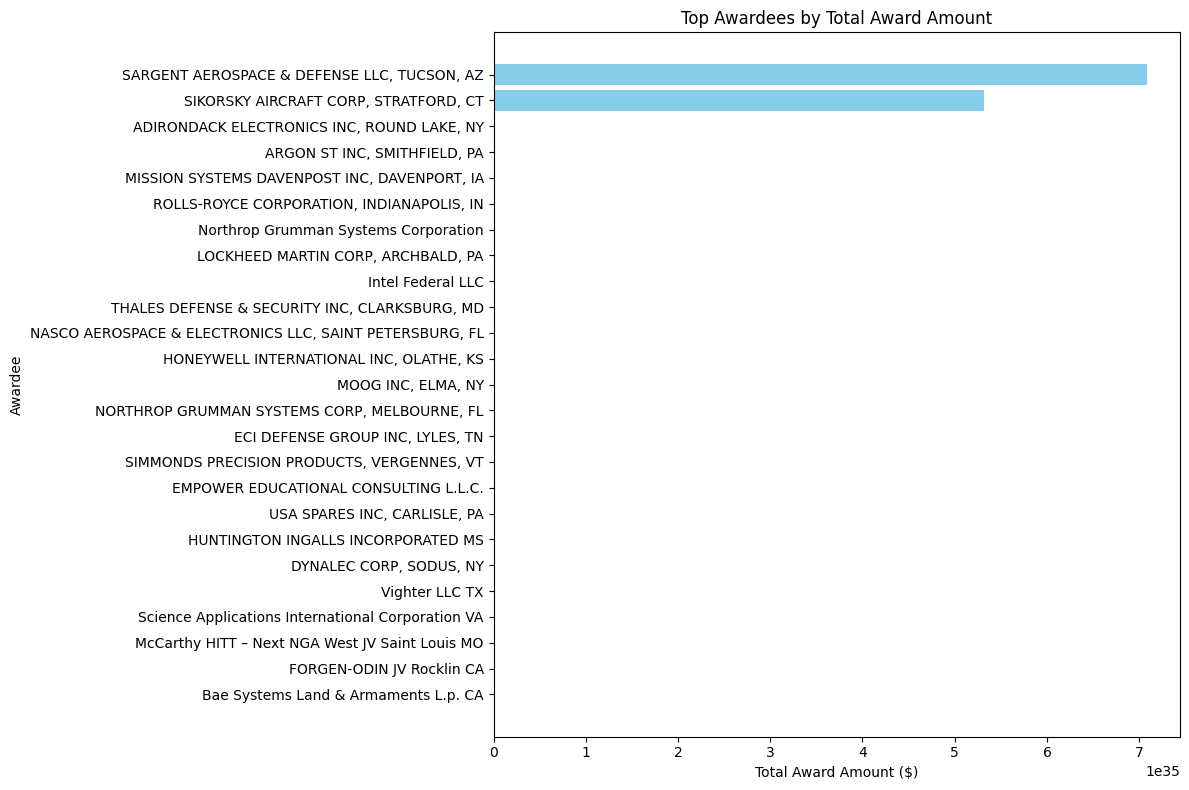

In [116]:
# Plotting the top 20 awardees by Total Award Amount
top_awardees = summary_table_awardee_display_cleaned_clean.head(25)

plt.figure(figsize=(12, 8))
plt.barh(top_awardees['Awardee'], top_awardees['Total Award Amount ($)'], color='skyblue')
plt.xlabel('Total Award Amount ($)')
plt.ylabel('Awardee')
plt.title('Top Awardees by Total Award Amount')
plt.gca().invert_yaxis()  # Highest values at the top
plt.tight_layout()
plt.show()